In [1]:

# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


In [2]:
!pip install xgboost

In [3]:
from xgboost import XGBRegressor

In [4]:
data=read_csv(r'C:\Users\HP\Downloads\gld_price_data.csv')

In [5]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
import pandas as pd

In [7]:
def series_to_supervised(data_input, n_in=1, n_out=1, dropnan=True):
    # df = pd.DataFrame(data)
    df= data_input["GLD"]
    # print(df)
    n_vars = 1 if type(data_input) is list else data.shape[1]
    df =data_input["GLD"]
    cols = list()
     # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
     # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
     # put it all together
    agg = concat(cols, axis=1)
     # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        return agg.values
    
 

In [8]:
train = series_to_supervised(data, n_in=73)
train

array([[ 84.860001,  85.57    ,  85.129997, ...,  90.25    ,  90.269997,
         89.220001],
       [ 85.57    ,  85.129997,  84.769997, ...,  90.269997,  89.220001,
         87.220001],
       [ 85.129997,  84.769997,  86.779999, ...,  89.220001,  87.220001,
         87.690002],
       ...,
       [125.860001, 126.419998, 126.650002, ..., 124.589996, 124.330002,
        125.18    ],
       [126.419998, 126.650002, 127.279999, ..., 124.330002, 125.18    ,
        124.489998],
       [126.650002, 127.279999, 128.830002, ..., 125.18    , 124.489998,
        122.5438  ]])

In [9]:

# split into input and output columns
trainX, trainy = train[0:2200, :-1], train[0:2200, -1]
testX, testy= train[2200:-6, :-1], train[2200:-6, -1]
# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=10000, max_depth =9)
model.fit(trainX, trainy)
# construct an input for a new preduction
# row = data["GLD"].values
# make a one-step prediction
yhat = model.predict(testX)
# print('Input: %s, Predicted: %.3f' % (row, yhat[0]))


In [10]:
yhat.shape

(11,)

In [11]:
trainy.shape

(2200,)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
r2 = r2_score(testy,yhat)
print(r2)

0.8941069510068781


In [13]:
import numpy as np
mse = mean_squared_error(testy,yhat)
#print(mse)
rmse = np.sqrt(mse)
#print(rmse)
mape=mean_absolute_percentage_error(testy,yhat)
print(mape)

0.0030378689345532174


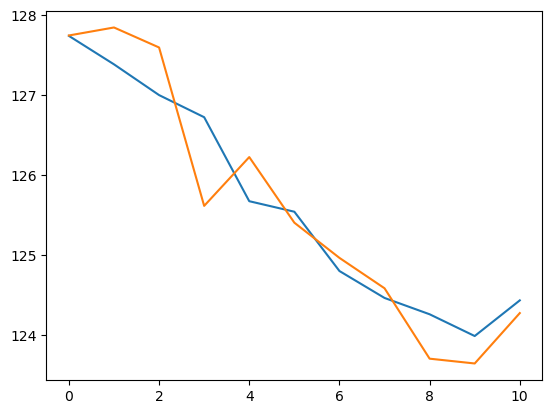

In [14]:

plt.plot(yhat)
plt.plot(testy)
plt.show()

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
r2 = r2_score(testy,yhat)
print(r2)

0.8941069510068781


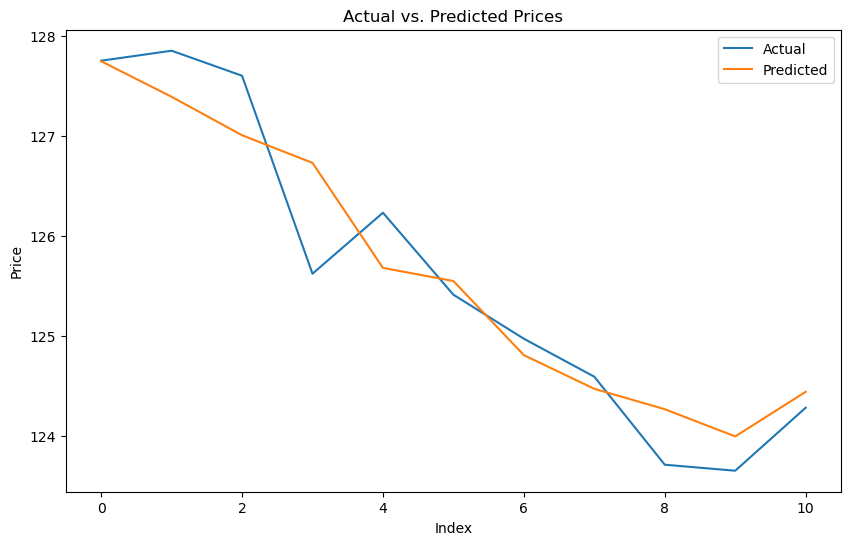

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(testy, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [17]:
mse = mean_squared_error(testy,yhat)
print(mse)

0.23731656086673739
